<a href="https://colab.research.google.com/github/Ahmed-Magdi1/2DOF-Helicopter-FNN/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [82]:
# Load the input and output data files
inputs_file = '/content/inputs.csv' # inputs
outputs_file = '/content/outputs.csv' # outputs

inputs = pd.read_csv(inputs_file)  # Columns: V, I_pitch, I_yaw
outputs = pd.read_csv(outputs_file)  # Columns: pitch_angle, yaw_angle

print(inputs.head())
print(outputs.head())
print(train_data.columns)

       V  I_pitch  I_yaw
0  15.92     0.00   0.00
1  15.90     0.00   1.00
2  13.97     2.85   3.17
3  11.59     7.89   5.74
4   7.44    10.13   7.45
   pitch_angle  yaw_angle
0          0.0       0.25
1          0.0       0.25
2          0.0       0.25
3          0.0       0.25
4          0.0       0.00
Index(['V', 'I_pitch', 'I_yaw', 'pitch_angle', 'yaw_angle'], dtype='object')


In [83]:
# Combine input and output for alignment
data = pd.concat([inputs, outputs], axis=1)

# Shuffle and split data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Separate inputs and outputs
X_train = train_data[['V', 'I_pitch', 'I_yaw']].values
Y_train = train_data[['pitch_angle', 'yaw_angle']].values

X_val = val_data[['V', 'I_pitch', 'I_yaw']].values
Y_val = val_data[['pitch_angle', 'yaw_angle']].values

X_test = test_data[['V', 'I_pitch', 'I_yaw']].values
Y_test = test_data[['pitch_angle', 'yaw_angle']].values

In [84]:
# Create scalers
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Fit scalers on training data and transform all datasets
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

Y_train_scaled = scaler_Y.fit_transform(Y_train)
Y_val_scaled = scaler_Y.transform(Y_val)
Y_test_scaled = scaler_Y.transform(Y_test)

In [85]:
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=3),  # Input layer: 3 (V, I_pitch, I_yaw)
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')  # Output layer: 2 (pitch_angle, yaw_angle)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,962 (66.26 KB)

 Trainable params: 16,962 (66.26 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
# Train the model
history = model.fit(
    X_train_scaled, Y_train_scaled,
    validation_data=(X_val_scaled, Y_val_scaled),
    epochs=300,
    batch_size=64,
    verbose=1
)

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2967 - mae: 0.4824 - val_loss: 0.0944 - val_mae: 0.2670
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0765 - mae: 0.2218 - val_loss: 0.0829 - val_mae: 0.1973
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0623 - mae: 0.1692 - val_loss: 0.0617 - val_mae: 0.1977
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0562 - mae: 0.1921 - val_loss: 0.0553 - val_mae: 0.1703
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0500 - mae: 0.1620 - val_loss: 0.0524 - val_mae: 0.1600
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - mae: 0.1489 - val_loss: 0.0506 - val_mae: 0.1601
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0450 - mae: 0.1522 - val_loss: 0.0498 - val_mae: 0.1566
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0456 - mae: 0.1494 - val_loss: 0.0491 - val_mae: 0.1565
Epoch 9/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.04

In [87]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, Y_test_scaled)
print(f"Test Loss: {loss}, Test MAE: {mae}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272 - mae: 0.1063 
Test Loss: 0.025443533435463905, Test MAE: 0.10383087396621704


In [88]:
# Save the trained model
model.save('2dof_helicopter_model.h5')

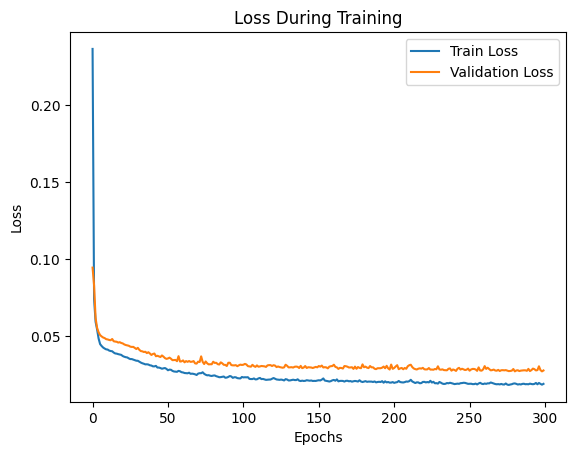

In [89]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


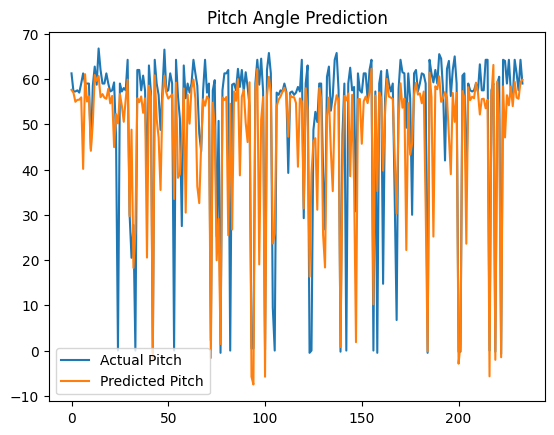

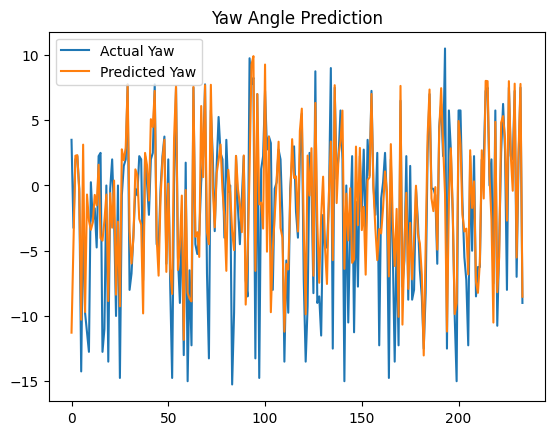

In [90]:
# Predict on test set
Y_pred_scaled = model.predict(X_test_scaled)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)  # Inverse transform predictions
Y_actual = scaler_Y.inverse_transform(Y_test_scaled)

# Plot actual vs predicted
plt.figure()
plt.plot(Y_actual[:, 0], label='Actual Pitch')
plt.plot(Y_pred[:, 0], label='Predicted Pitch')
plt.legend()
plt.title('Pitch Angle Prediction')
plt.show()

plt.figure()
plt.plot(Y_actual[:, 1], label='Actual Yaw')
plt.plot(Y_pred[:, 1], label='Predicted Yaw')
plt.legend()
plt.title('Yaw Angle Prediction')
plt.show()

In [97]:
custom_objects = {'mse': MeanSquaredError()}

# Load the model
model = load_model('/content/2dof_helicopter_model.h5', custom_objects=custom_objects)

# Make new predictions
new_inputs = [[15, 2, 2]]
new_inputs_scaled = scaler_X.transform(new_inputs)
new_prediction_scaled = model.predict(new_inputs_scaled)
new_prediction = scaler_Y.inverse_transform(new_prediction_scaled)
print(f"Predicted Outputs: {new_prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Outputs: [[43.70716    1.1015639]]


In [94]:
# Compare predictions and actual values
comparison = pd.DataFrame({
    'Predicted Pitch': Y_pred[:, 0],
    'Actual Pitch': Y_actual[:, 0],
    'Predicted Yaw': Y_pred[:, 1],
    'Actual Yaw': Y_actual[:, 1]
})

# Display the first 60 samples
print(comparison.head(60))

    Predicted Pitch  Actual Pitch  Predicted Yaw  Actual Yaw
0         57.604359         61.25     -11.278845        3.50
1         56.994373         57.25      -4.435532       -3.25
2         54.968426         57.25       2.278383        2.00
3         55.392429         57.50       2.327188        2.25
4         55.425686         57.00      -0.490298       -0.25
5         55.948257         59.00     -10.288577      -14.25
6         40.140938         61.25       3.130179       -2.00
7         61.070274         59.00      -9.694580       -9.75
8         55.017830         59.00      -0.692966      -11.25
9         56.185509         59.00      -2.696652      -12.75
10        44.141899         44.50      -3.395379        0.25
11        50.310921         58.50      -2.842409       -2.75
12        60.885231         62.75      -0.721346       -1.75
13        59.599098         58.75      -1.522636       -4.75
14        60.680626         66.75       1.587891        2.25
15        55.979080     

In [95]:
# Calculate MAE
mae_pitch = mean_absolute_error(Y_actual[:, 0], Y_pred[:, 0])
mae_yaw = mean_absolute_error(Y_actual[:, 1], Y_pred[:, 1])

# Calculate RMSE
rmse_pitch = np.sqrt(mean_squared_error(Y_actual[:, 0], Y_pred[:, 0]))
rmse_yaw = np.sqrt(mean_squared_error(Y_actual[:, 1], Y_pred[:, 1]))

# Print metrics
print(f"Pitch MAE: {mae_pitch}, Pitch RMSE: {rmse_pitch}")
print(f"Yaw MAE: {mae_yaw}, Yaw RMSE: {rmse_yaw}")

Pitch MAE: 8.002401598816753, Pitch RMSE: 12.558975765172752
Yaw MAE: 2.7349161299375386, Yaw RMSE: 3.94711004466249


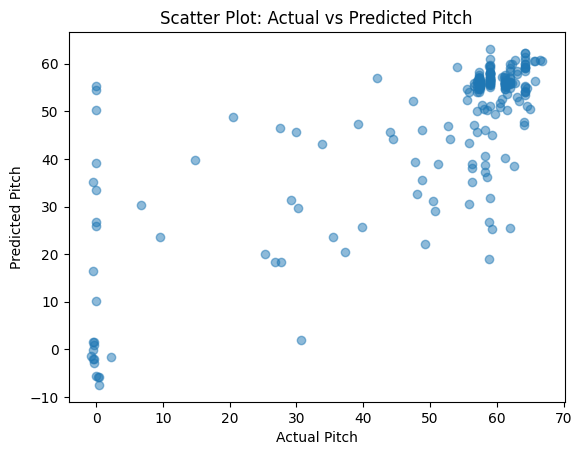

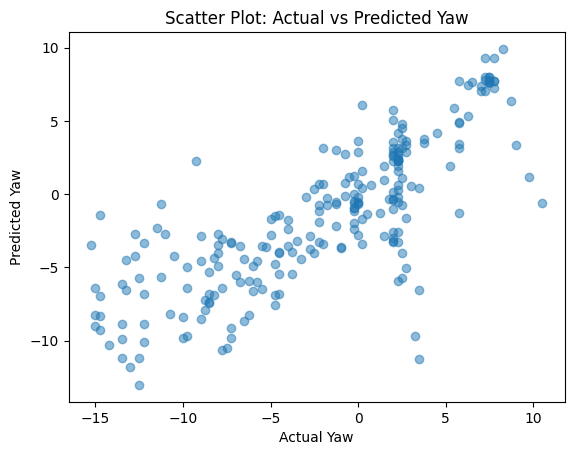

In [96]:
# Scatter plot for Pitch
plt.scatter(Y_actual[:, 0], Y_pred[:, 0], alpha=0.5)
plt.xlabel('Actual Pitch')
plt.ylabel('Predicted Pitch')
plt.title('Scatter Plot: Actual vs Predicted Pitch')
plt.show()

# Scatter plot for Yaw
plt.scatter(Y_actual[:, 1], Y_pred[:, 1], alpha=0.5)
plt.xlabel('Actual Yaw')
plt.ylabel('Predicted Yaw')
plt.title('Scatter Plot: Actual vs Predicted Yaw')
plt.show()